In [58]:
# import mathematical libraries
import pandas as pd
import numpy as np

# import ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from  plotly.subplots import make_subplots
import plotly.graph_objects as go
plotly.offline.init_notebook_mode (connected = True)

# import geomaping libraries
# pip install geopy
# pip install folium
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium
from folium import plugins

# import string manipulation libraries
import string
import re

# import nltk and others libraries
import nltk
import nltk.corpus
from nltk.corpus import stopwords
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

from collections import defaultdict
from collections import Counter
stop = set(stopwords.words('english'))

# import NN libraries
'''from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant'''

# import library for data spliting
from sklearn.model_selection import train_test_split

# import TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# import scikit-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

# import model evaluation libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# pip install --update scikit-learn
# pip install scikitplot
from scikitplot.metrics import plot_confusion_matrix, plot_roc

# import time
import time

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df_train.shape, df_test.shape

((7613, 5), (3263, 4))

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
# show a random sample from the train dataset
df_train['text'][56]

'TRUCK ABLAZE : R21. VOORTREKKER AVE. OUTSIDE OR TAMBO INTL. CARGO SECTION. http://t.co/8kscqKfKkF'

# **EDA**

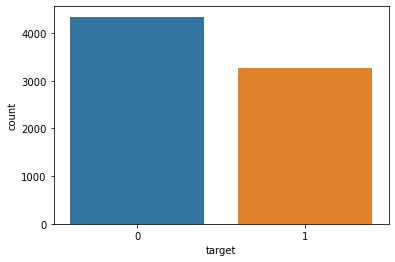

In [7]:
# Count of target feature
sns.countplot(df_train['target'])
plt.show()

In [8]:
# Percentage of missing keywords on the dataset
missing_keywords = df_train['keyword'].isnull().sum()/len(df_train)*100
print('{:.2f}'.format(missing_keywords),'%')

0.80 %


In [9]:
# Percentage of missing keywords on disaster tweets
key1 = df_train['keyword'].isnull()[df_train['target'] == 1].sum()/len(df_train[df_train['target'] == 1])*100
print('%.2f' %key1, '%')

1.28 %


In [10]:
# Percentage of missing keywords on non-disaster tweets
key0 = df_train['keyword'].isnull()[df_train['target'] == 0].sum()/len(df_train[df_train['target'] == 0])*100
print('%.2f' %key0, '%')

0.44 %


In [11]:
df_train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [12]:
# count of non disaster related keywords
non_disaster_tweets = df_train[df_train['target']==0].groupby('keyword').size().sort_values(ascending=False)[:20]
non_disaster_tweets

keyword
body%20bags    40
harm           37
armageddon     37
wrecked        36
ruin           36
deluge         36
explode        35
twister        35
fear           35
siren          35
aftershock     34
panic          34
screaming      34
blizzard       33
blazing        33
blaze          33
crush          33
sinking        33
traumatised    33
curfew         32
dtype: int64

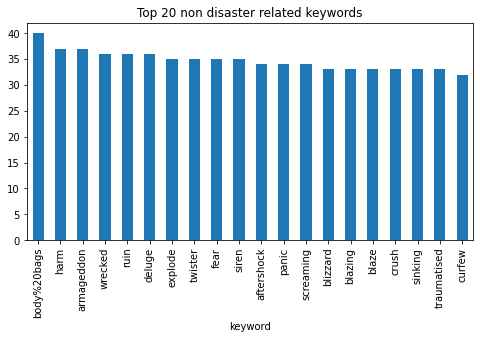

In [13]:
# plot for top 20 non disaster keywords
plt.figure(figsize=(8, 4))
non_disaster_tweets.plot(kind='bar')
plt.title('Top 20 non disaster related keywords')
plt.show()

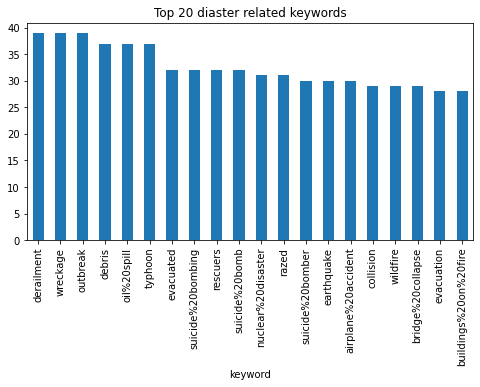

In [14]:
# plot for top 20 disaster related keywords
disaster_tweets = df_train[df_train['target']==1].groupby('keyword').size().sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 4))
disaster_tweets.plot(kind='bar')
plt.title('Top 20 diaster related keywords')
plt.show()

In [15]:
# Percentage of data where the location is missing
missing = df_train['location'].isnull().sum()/len(df_train)*100
print('Missing locations is {:.2f}' .format(missing), '%')

Missing locations is 33.27 %


In [16]:
# Percentage of missing locations on disaster tweet
missing_disaster = df_train[df_train['target']==1]['location'].isnull().sum()/len(df_train[df_train['target']==1])*100
print('%.2f '% missing_disaster,'%')

32.86  %


In [17]:
# Percentage of missing locations on non-disaster tweet
missing_non_disaster = df_train[df_train['target']==0]['location'].isnull().sum()/len(df_train[df_train['target']==0])*100
print('%.2f' %missing_non_disaster, '%')

33.58 %


In [18]:
# Top 20 tweet locations
locations20 = df_train.groupby('location').size().sort_values(ascending=False)[:20]
locations20

location
USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Chicago, IL         18
Australia           18
California          17
Everywhere          15
New York, NY        15
California, USA     15
San Francisco       14
dtype: int64

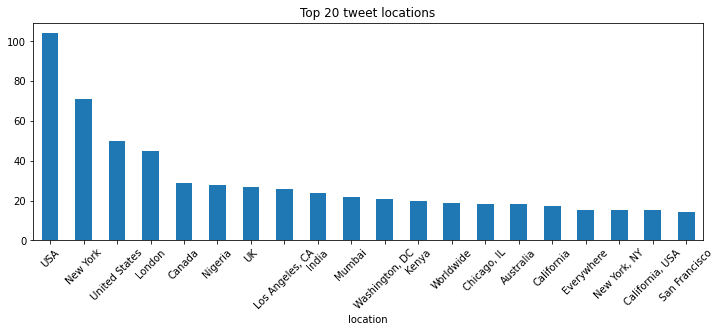

In [19]:
plt.figure(figsize=(12, 4))
locations20.plot(kind='bar')
plt.title('Top 20 tweet locations')
plt.xticks(rotation=45)
plt.show()

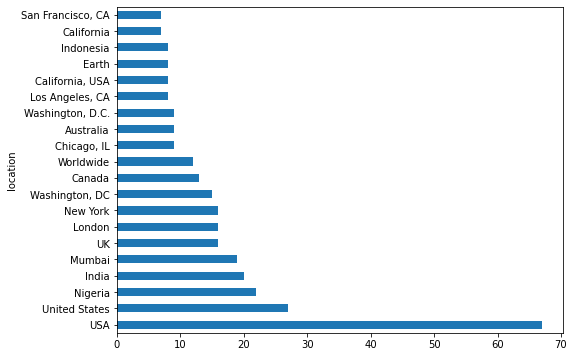

In [20]:
# Top 20 locations in disaster tweets
location1 = df_train[df_train['target']==1].groupby('location').size().sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
location1.plot(kind='barh')
plt.show()

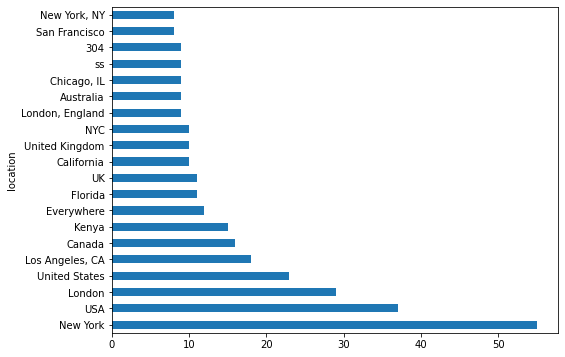

In [21]:
# Top 20 location on non-disaster tweets
location0 = df_train[df_train['target'] == 0].groupby('location').size().sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
location0.plot(kind='barh')
plt.show()

In [22]:
# Top 12 tweet locations

new_df = pd.DataFrame()
new_df['location'] = ((df_train['location'].value_counts())[:12]).index
new_df['count'] = ((df_train['location'].value_counts())[:12]).values

geolocator = Nominatim(user_agent='Rahil')
geocode = RateLimiter(geolocator.geocode, min_delay_seconds = 0.5)
lat = {}
long = {}
for i in new_df['location']:
    location = geocode(i)
    lat[i] = location.latitude
    long[i] = location.longitude
new_df['latitude'] = new_df['location'].map(lat)
new_df['longitude'] = new_df['location'].map(long)
map = folium.Map(location = [10.0, 10.0], tiles='CartoDB dark_matter', zoom_start=1.5)
markers = []
title = '''<h1 align = "center" style = "font-size: 15px"><b> Top 12 Tweet Locations </b></h1>'''
for i, r in new_df.iterrows():
    loss=r['count']
    if r['count'] > 0:
        counts = r['count'] * 0.4
        folium.CircleMarker([float(r['latitude']), float(r['longitude'])], radius=float(counts), color='lightcoral', fill=True).add_to(map)
map.get_root().html.add_child(folium.Element(title))
map

In [23]:
# count words in the text
df_train['len_text'] = df_train['text'].apply(lambda x: len(x.split()))
df_train.head()

,id,keyword,location,text,target,len_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16


In [24]:
# count the characters in the text
def char_count(text):
    char = 0
    for c in text.split():
        char += len(c)
    return char
df_train['len_chars'] = df_train['text'].apply(char_count)
df_train.head()

,id,keyword,location,text,target,len_text,len_chars
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,57
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,32
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,112
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,57
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,72


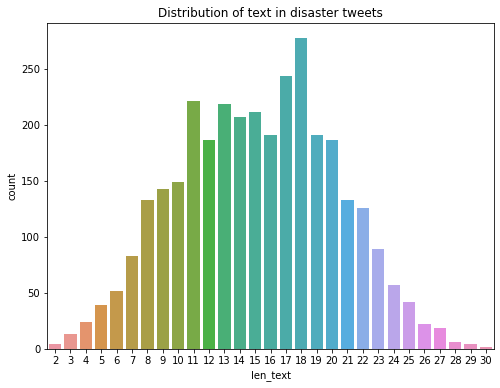

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(df_train[df_train['target']==1]['len_text'])
plt.title('Distribution of text in disaster tweets')
plt.show()

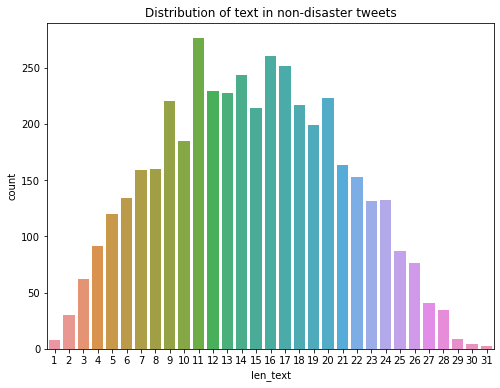

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(df_train[df_train['target']==0]['len_text'])
plt.title('Distribution of text in non-disaster tweets')
plt.show()

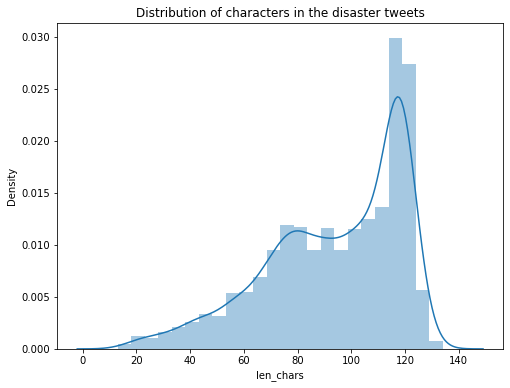

In [27]:
plt.figure(figsize=(8, 6))
sns.distplot(df_train[df_train['target']==1]['len_chars'])
plt.title('Distribution of characters in the disaster tweets')
plt.show()

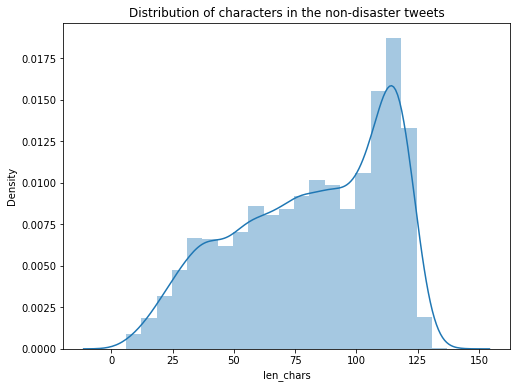

In [28]:
plt.figure(figsize=(8, 6))
sns.distplot(df_train[df_train['target']==0]['len_chars'])
plt.title('Distribution of characters in the non-disaster tweets')
plt.show()

In [29]:
# Top 100 most used words in the tweets
top100 = df_train['text'].str.split(expand=True).stack().value_counts()[:100]
top100

the           2575
a             1845
to            1805
in            1757
of            1722
              ... 
California      89
some            88
still           88
burning         86
back            85
Length: 100, dtype: int64

In [30]:
x = df_train['text'].apply(lambda x: x.split())
dict = {}
for i in x:
    for j in i:
        if j not in dict:
            dict.update({j:1})
        else:
            dict[j] = dict[j] + 1
sorted(dict.items(), key=lambda x: x[1], reverse=True)[:10]

[('the', 2575),
 ('a', 1845),
 ('to', 1805),
 ('in', 1757),
 ('of', 1722),
 ('and', 1302),
 ('I', 1197),
 ('for', 820),
 ('is', 814),
 ('on', 773)]

In [31]:
fig=px.treemap(top100, path=[top100.index], values=0)
fig.update_traces(textinfo='label+value')
fig.update_layout(title={
    'text': 'Tweets',
    'y': 0.95,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top'
})
fig.show()

# **Analysing Corpus**

In [32]:
# Put the text series into a list
corpus = []

for x in df_train['text'].str.split():
    for i in x:
        corpus.append(i)

In [33]:
dic = defaultdict(int)
for word in corpus:
    if word not in stop: # stop defined in the 1st cell as 'stop = set(stopwords.words('english'))'
        dic[word]+=1
        
top = sorted(dic.items(), key=lambda x:x[1], reverse=True)[:30]
x,y=zip(*top)
fig=px.bar(x=x,y=y)
fig.update_layout(title={
    'text': 'Most commont Non-Stopwords',
    'y': 0.95,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top'
},xaxis_title='Words', yaxis_title='Frequency')

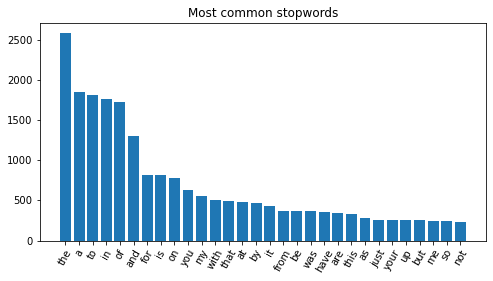

In [34]:
dict2={}
for word in corpus:
    if word in stop:
        if word not in dict2:
            dict2.update({word: 1})
        else:
            dict2[word] += 1
instop = sorted(dict2.items(), key=lambda x:x[1], reverse=True)[:30]
x, y = zip(*instop)
plt.figure(figsize=(8, 4))
plt.bar(x,y)
plt.title('Most common stopwords')
plt.xticks(rotation=60)
plt.show()

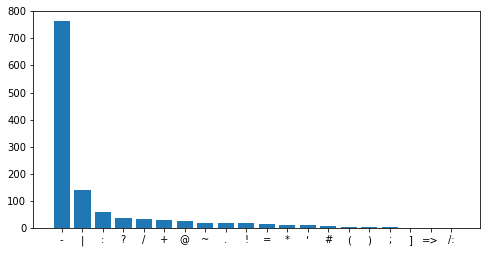

In [35]:
dict3 = {}
punc=string.punctuation
for word in corpus:
    if word in punc:
        if word not in dict3:
            dict3.update({word:1})
        else:
            dict3[word] += 1
punct = sorted(dict3.items(), key=lambda x:x[1], reverse=True)[:20]
x, y = zip(*punct)
plt.figure(figsize=(8, 4))
plt.bar(x, y)
plt.show()

# **Cleaning text**

In [36]:
def clean_text(text):
    text=str(text).lower() # converts text to lowercase
    text=re.sub('\d+', '', text) # removes numbers
    text=re.sub('\[.*?\]', '', text) # removes HTML tags
    text=re.sub('https ?://\S+|www\.\S+', '', text) # removes urls
    text=re.sub(r"["
    u"\U0001F600-\U0001F64F" # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
                "]+", "", text) #removes emojis
    text=re.sub('[%s]' % re.escape(string.punctuation), '', text) #removes puntuations
    # removes punctuations
    # text = re.sub('\n', '', text)
    # text = re.sub('\w*\d\w*', '', text)
    return text

df_train['clean_text'] = df_train['text'].apply(clean_text)
df_train.head()

,id,keyword,location,text,target,len_text,len_chars,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,57,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,32,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,112,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,57,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,72,just got sent this photo from ruby alaska as s...


# **Remove stopwords**

In [37]:
df_train['clean_text'] = df_train['clean_text'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_train.head()

,id,keyword,location,text,target,len_text,len_chars,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,57,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,32,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,112,residents asked shelter place notified officer...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,57,people receive wildfires evacuation orders cal...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,72,got sent photo ruby alaska smoke wildfires pou...


# **Lemmatize**

In [38]:
# Lemmatize- reduce the word to its root, eg doing to do
lemma = WordNetLemmatizer()

def preprocessdata(text):
    text = ' '.join(lemma.lemmatize(word) for word in text.split(' '))
    return text

df_train['final_text'] = df_train['clean_text'].apply(preprocessdata)
df_train.head()

,id,keyword,location,text,target,len_text,len_chars,clean_text,final_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,57,deeds reason earthquake may allah forgive us,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,32,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,112,residents asked shelter place notified officer...,resident asked shelter place notified officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,57,people receive wildfires evacuation orders cal...,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,72,got sent photo ruby alaska smoke wildfires pou...,got sent photo ruby alaska smoke wildfire pour...


In [39]:
df_train['final_text'].str.split()

0       [deed, reason, earthquake, may, allah, forgive...
1           [forest, fire, near, la, ronge, sask, canada]
2       [resident, asked, shelter, place, notified, of...
3       [people, receive, wildfire, evacuation, order,...
4       [got, sent, photo, ruby, alaska, smoke, wildfi...
                              ...                        
7608    [two, giant, crane, holding, bridge, collapse,...
7609    [ariaahrary, thetawniest, control, wild, fire,...
7610              [km, volcano, hawaii, httptcozdtoydebj]
7611    [police, investigating, ebike, collided, car, ...
7612    [latest, home, razed, northern, california, wi...
Name: final_text, Length: 7613, dtype: object

In [40]:
# Top 100 most used tweets for Non-disaster cleaned tweets
TopCleanNonDisaster = df_train[df_train['target']==0]['final_text'].str.split(expand=True).stack().value_counts()[:100]
TopCleanNonDisaster

like       255
im         242
amp        193
get        185
new        168
          ... 
car         39
home        38
may         38
he          38
without     38
Length: 100, dtype: int64

In [41]:
fig = px.treemap(TopCleanNonDisaster, path=[TopCleanNonDisaster.index], values=0)
fig.update_traces(textinfo='label+value')
fig.show()

In [42]:
TopCleanDisaster = df_train[df_train['target']==1]['final_text'].str.split(expand=True).stack().value_counts()[:100]
fig=px.treemap(TopCleanDisaster, path=[TopCleanNonDisaster], values=0)
fig.update_traces(textinfo='label+value')
fig.show()

# **Wordcloud**

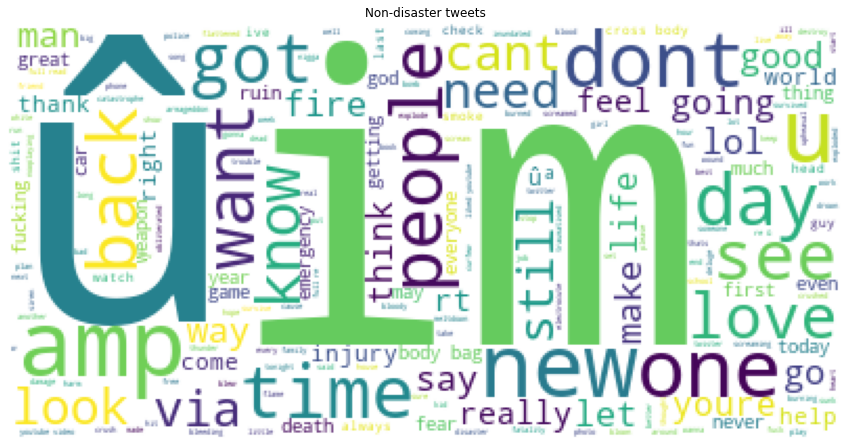

In [43]:
# wordcloud for non-disaster tweets
plt.figure(figsize=(15, 10))
wc = WordCloud(max_words=500, background_color='white')
wc.generate(' '.join(word for word in df_train.loc[df_train['target']==0, 'final_text']))
plt.imshow(wc)
plt.axis('off')
plt.title('Non-disaster tweets')
plt.show()

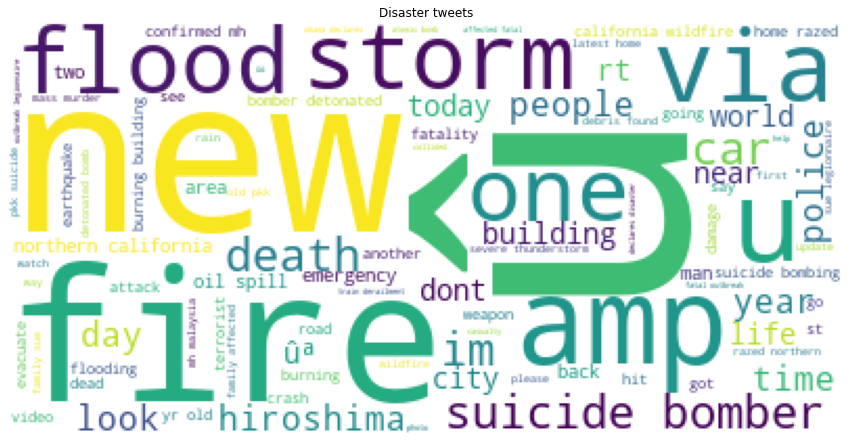

In [44]:
# wordcloud for disaster tweets
plt.figure(figsize=(15, 10))
wc = WordCloud(max_words=500, background_color='white')
wc.generate(' '.join(word for word in df_train.loc[df_train['target']==1, 'final_text']))
plt.imshow(wc)
plt.axis('off')
plt.title('Disaster tweets')
plt.show()

# **Splitting the data**

In [45]:
X = df_train['final_text']
y = df_train['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **Applying TF-IDF**

In [46]:
'''TF-IDF = Term Frequency Inverse Document Frequency - 
how relevant a word is to a text'''
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

# **Training**

In [47]:
def train_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = round(precision_score(y_test, y_pred, average='weighted'), 3)
    recall = round(recall_score(y_test, y_pred, average='weighted'), 3)
    
    print('Accuracy %.2f' %(accuracy*100),'%')
    print('Precision %.2f' %(precision*100), '%')
    print('Recall %.2f' %(recall*100), '%')
    print('*'*50)
    print(classification_report(y_test, y_pred))
    
    fig, ax = plt.subplots(1, 2, figsize=(25, 8))
    ax1 = plot_confusion_matrix(y_test, y_pred, ax=ax[0], cmap='YlGnBu')
    ax2 = plot_roc(y_test, y_prob, ax=ax[1], plot_macro=False, plot_micro=False, cmap='summer')

# **Logistic Regression**

Accuracy 81.62 %
Precision 81.90 %
Recall 81.60 %
**************************************************
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       869
           1       0.84      0.70      0.77       654

    accuracy                           0.82      1523
   macro avg       0.82      0.80      0.81      1523
weighted avg       0.82      0.82      0.81      1523



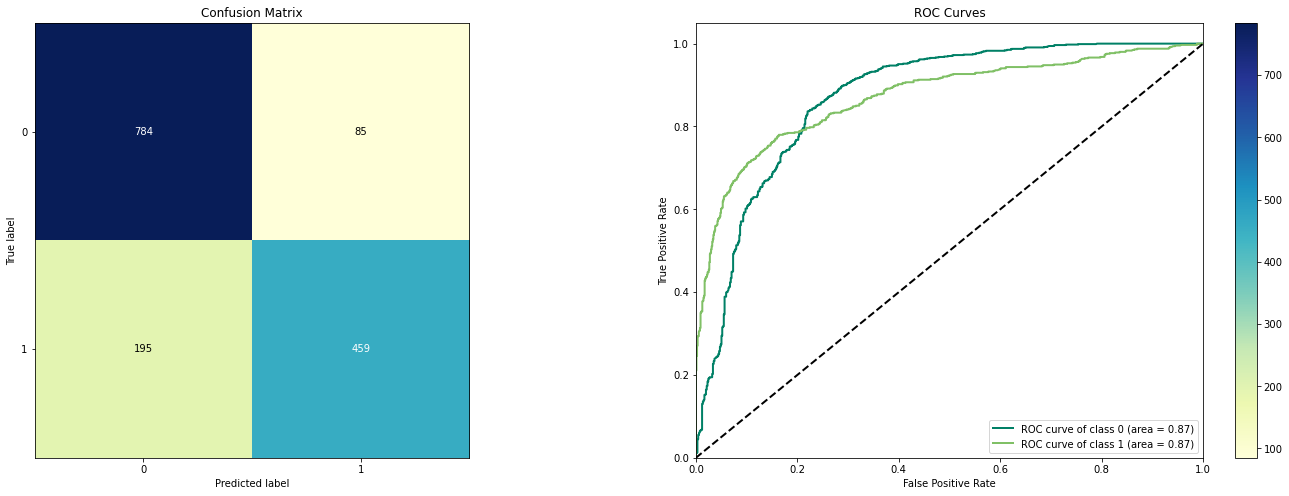

In [48]:
logreg = LogisticRegression()
train_model(logreg)

Accuracy 82.21 %
Precision 83.00 %
Recall 82.20 %
**************************************************
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       869
           1       0.87      0.68      0.77       654

    accuracy                           0.82      1523
   macro avg       0.84      0.80      0.81      1523
weighted avg       0.83      0.82      0.82      1523



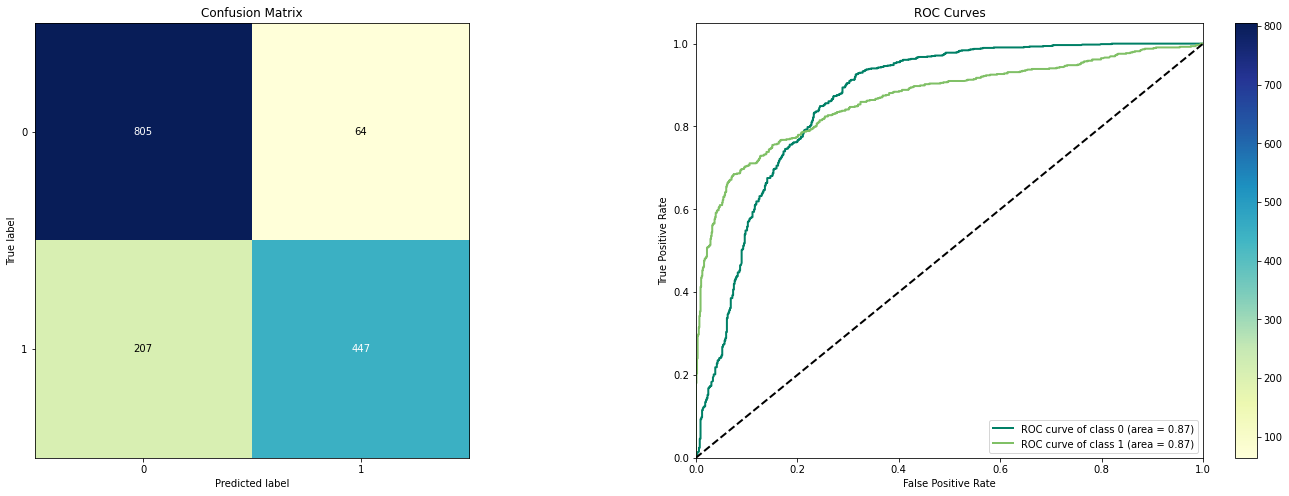

In [49]:
multNB = MultinomialNB()
train_model(multNB)

# **Neural Network -RNN(LSTM)**

In [50]:
'''embedding_vector_features = 45
voc_size = 10000
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=20))

model.add(LSTM(128, input_shape=(df_train.shape), activation='relu', return_sequence=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()'''

"embedding_vector_features = 45\nvoc_size = 10000\nmodel = Sequential()\nmodel.add(Embedding(voc_size, embedding_vector_features, input_length=20))\n\nmodel.add(LSTM(128, input_shape=(df_train.shape), activation='relu', return_sequence=True))\nmodel.add(Dropout(0.2))\n\nmodel.add(LSTM(128, activation='relu'))\nmodel.add(Dropout(0.2))\n\nmodel.add(Dense(32, activation='relu'))\nmodel.add(Dropout(0.2))\n\nmodel.add(Dense(2, activation='softmax'))\nmodel.compile(loss='binary_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])\nmodel.summary()"

# **Processing test data**

In [51]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [52]:
# Cleaning the test data
df_test['clean_text'] = df_test['text'].apply(clean_text)
df_test['clean_text'] = df_test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_test['final_text'] = df_test['clean_text'].apply(preprocessdata)

In [55]:
# Performing TF-IDF on the test data
test_tfidf = tfidf.transform(df_test['final_text']).toarray()

In [61]:
# Make prediction using multinomialNB and check prediction time
start = time.time()
final_pred = multNB.predict(test_tfidf)
end = time.time()
pred_time = end-start

print('Prediction time %.2f' %pred_time, 'secs')

Prediction time 0.24


# **Submission**

In [62]:
submission = df_test[['id']].reset_index(drop=True)
submission['target'] = final_pred.astype('int64')
submission.head()

,id,target
0,0,0
1,2,0
2,3,1
3,9,1
4,11,1


In [64]:
submission.to_csv('submission.csv', index=False)
print('Submission file created!!!')

Submission file created!!!
